# BUSINESS CASE

### Customer Segmentation:
**Effectively segmenting customers to gain a holistic understanding of customer groups with shared characteristics. This will enable businesses to optimize marketing and service strategies, enhance personalized interactions, and elevate the overall customer experience.**

### Dataset: 
- A customer dataset is a collection of information about customers over a defined period of time.
- Number of records: 3069
- Structure: 8 categorical fields & 23 numeric fields
- Time: 2 years

### IMPORT THE LIBRARIES

In [63]:
# Base
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
#Hypothesis Testing
from scipy.stats import shapiro
import scipy.stats as stats
#Others imports
import statsmodels.stats.api as sms
import matplotlib as mpl
from math import ceil
# Configuration
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter (action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display. float_format = '{:.4f}'.format
%matplotlib inline
                                    
# Some plot styling preferences
plt.style.use('seaborn-whitegrid')
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 14}
mpl.rc('font', **font)

## DATA CLEANING

#### READ THE DATASET

In [77]:
raw_data = pd.read_csv('03. [DAZONE2024] DATASET.csv')
raw_data.head()

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_Visits_Month,Promo_30,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
0,6815,1982.0000,PhD,30396.0000,30-04-2023,22.0000,16.0000,2.0000,6.0000,0.0000,1.0000,12.0000,2.0000,1.0000,1.0000,2.0000,7.0000,1.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,Male,NaN,84167329039.0000,2023.0000,4.0000,6.0000,Married_1,Cash
1,2567,NaN,NaN,83532.0000,26-09-2022,36.0000,756.0000,NaN,562.0000,NaN,64.0000,224.0000,1.0000,4.0000,6.0000,4.0000,1.0000,0.0000,NaN,NaN,0.0000,0.0000,0.0000,Other,84319894707.0000,NaN,NaN,NaN,15.0000,Together_0,NaN
2,6053,1982.0000,PhD,68682.0000,06-10-2022,56.0000,920.0000,2.0000,505.0000,99.0000,30.0000,45.0000,1.0000,4.0000,9.0000,10.0000,2.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,Male,84908534649.0000,NaN,2022.0000,10.0000,24.0000,Together_0,Cash
3,1985,2002.0000,PhD,63516.0000,06-07-2022,30.0000,142.0000,13.0000,114.0000,15.0000,14.0000,5.0000,4.0000,4.0000,1.0000,7.0000,5.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,Female,84041679459.0000,NaN,2022.0000,7.0000,16.0000,Together_2,Online
4,6860,NaN,PhD,51650.0000,11-05-2023,NaN,153.0000,5.0000,22.0000,2.0000,5.0000,7.0000,1.0000,4.0000,NaN,4.0000,5.0000,NaN,-1.0000,0.0000,NaN,0.0000,0.0000,NaN,84912160813.0000,NaN,2023.0000,NaN,10.0000,Married_1,Mobile


#### SUMMARY STATS

In [78]:
summary_stats = pd.DataFrame({
    'Non-Null Count': raw_data.count(),
    'Unique Values': raw_data.nunique(),
    'Missing Values': raw_data.isnull().sum()
})
summary_stats

,Non-Null Count,Unique Values,Missing Values
ID,3069,2240,0
Year_Of_Birth,2832,28,237
Academic_Level,2799,5,270
Income,2782,1974,287
Registration_Time,2824,663,245
Recency,2804,100,265
Liquor,2807,776,262
Vegetables,2810,158,259
Pork,2806,558,263
Seafood,2813,182,256


- **ID**: ID is the *primary key*, but the number of unique values does not match the total number of records; therefore, it is currently **duplicated**.

In [79]:
import math

def deal_with_nan(df):
    for col in df:
        try:
            df[col] = df[col].fillna(df[col].mode().item())
        except:
            pass
    return df.drop_duplicates()

raw_data = raw_data.groupby('ID').apply(deal_with_nan).reset_index(drop = True)

- There are some rows with the same ID but non-duplicate corresponding data, therefore, we will match the rows to fill in the data for each ID when deleting duplicates.

In [80]:
summary_stats = pd.DataFrame({
    'Non-Null Count': raw_data.count(),
    'Unique Values': raw_data.nunique(),
    'Missing Values': raw_data.isnull().sum()
})
summary_stats

,Non-Null Count,Unique Values,Missing Values
ID,2240,2240,0
Year_Of_Birth,2240,28,0
Academic_Level,2240,5,0
Income,2216,1974,24
Registration_Time,2240,663,0
Recency,2240,100,0
Liquor,2240,776,0
Vegetables,2240,158,0
Pork,2240,558,0
Seafood,2240,182,0


After removing duplicates in the ID field, most of the other fields no longer have missing values. Some fields still has missing values, and the corresponding handling methods are as follows:
- **Income**: Use regression to fill in missing income based on the remaining data fields.
- **Phone and Phone_Number**: Match these two fields into one column called Phone because their data complement each other.
- **Year_Register and Month_Register**: Use **Registration_Time** to fill in these two fields.
- **Payment_Method**: Fill the missing values with **No_Record**.

#### *Handle missing values in the Income column using regression*

In [81]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from statsmodels.regression.linear_model import OLS

sub_data = raw_data[['ID', 'Income', 'Academic_Level', 'Year_Of_Birth', 'Recency', 'Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery', 'Gender']]
sub_data[['Marital_Status', 'Number_Of_Kids']] = raw_data['Living_With'].apply(lambda x: pd.Series(x.split('_'), index = ['Marital_Status', 'Number_Of_Kids']))
sub_data['Number_Of_Kids'] = sub_data['Number_Of_Kids'].astype(int)

edu_encoder = OneHotEncoder()
edu_encoder.fit(sub_data.Academic_Level.values.reshape(-1, 1))
sub_data[edu_encoder.categories_[0].tolist()] = edu_encoder.transform(sub_data.Academic_Level.values.reshape(-1, 1)).toarray()

gender_encoder = OneHotEncoder()
gender_encoder.fit(sub_data.Gender.values.reshape(-1, 1))
sub_data[gender_encoder.categories_[0].tolist()] = gender_encoder.transform(sub_data.Gender.values.reshape(-1, 1)).toarray()

marital_status_encoder = OneHotEncoder()
marital_status_encoder.fit(sub_data.Marital_Status.values.reshape(-1, 1))
sub_data[marital_status_encoder.categories_[0].tolist()] = marital_status_encoder.transform(sub_data.Marital_Status.values.reshape(-1, 1)).toarray()

dep_var = 'Income'
indep_vars = ['Year_Of_Birth', 'Recency', 'Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery',
              '2n Cycle', 'Graduation', 'Master', 'PhD', 'Female', 'Male', 'Married', 'Single', 'Together',
              'Divorced', 'Widow', 'Absurd', 'Alone', 'Number_Of_Kids']

y = sub_data.dropna()[dep_var].iloc[:-100]
X = sub_data.dropna()[indep_vars].iloc[:-100]
X['intercept'] = 1

model = OLS(y, X)
results = model.fit()

nan_data = sub_data[sub_data.Income.isna()]
nan_data[edu_encoder.categories_[0].tolist()] = edu_encoder.transform(nan_data.Academic_Level.values.reshape(-1, 1)).toarray()
nan_data[gender_encoder.categories_[0].tolist()] = gender_encoder.transform(nan_data.Gender.values.reshape(-1, 1)).toarray()

X = nan_data[indep_vars]
X['intercept'] = 1
nan_data['Income'] = (X.values @ results.params.values.reshape(-1, 1)).flatten()
nan_data

,ID,Income,Academic_Level,Year_Of_Birth,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,Gender,Marital_Status,Number_Of_Kids,2n Cycle,Basic,Graduation,Master,PhD,Female,Male,Other,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
149,1591,42396.2296,Graduation,1984.0000,95.0000,265.0000,2.0000,21.0000,12.0000,6.0000,147.0000,Other,Single,1,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
156,1607,36172.8455,2n Cycle,1979.0000,49.0000,6.0000,3.0000,9.0000,2.0000,0.0000,4.0000,Male,Single,2,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
170,1655,62421.5879,Master,1984.0000,87.0000,446.0000,39.0000,359.0000,98.0000,28.0000,18.0000,Other,Together,0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
197,1734,64923.8054,Graduation,1981.0000,67.0000,739.0000,22.0000,172.0000,52.0000,50.0000,20.0000,Other,Single,3,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
218,1817,38037.6435,Graduation,2002.0000,82.0000,72.0000,3.0000,16.0000,0.0000,0.0000,9.0000,Female,Married,2,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
265,2005,37175.9494,PhD,1992.0000,82.0000,24.0000,2.0000,15.0000,0.0000,2.0000,7.0000,Other,Single,1,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
348,2360,77391.1693,Graduation,1987.0000,69.0000,862.0000,140.0000,461.0000,60.0000,30.0000,61.0000,Female,Married,0,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
394,2571,57956.6714,Graduation,1989.0000,19.0000,6.0000,3.0000,3.0000,3.0000,263.0000,362.0000,Male,Single,1,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
406,2613,45626.3999,Master,1993.0000,39.0000,188.0000,7.0000,65.0000,26.0000,20.0000,14.0000,Female,Together,1,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
413,2665,37755.3517,Graduation,1983.0000,11.0000,6.0000,7.0000,6.0000,0.0000,2.0000,1.0000,Male,Married,1,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000


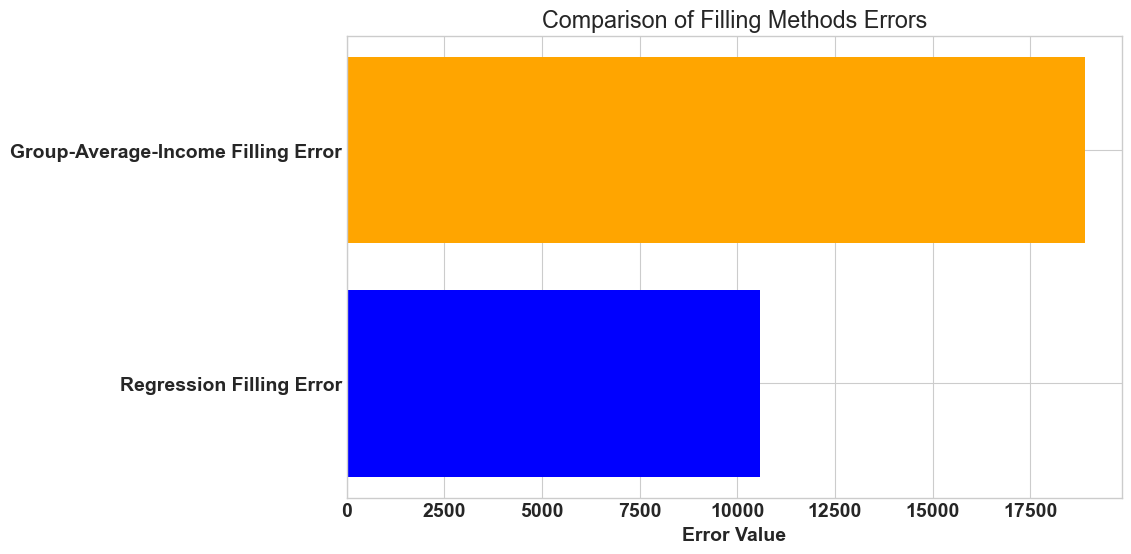

In [91]:
X = sub_data.dropna()[indep_vars].iloc[-100:]
y = sub_data.dropna()[dep_var].iloc[-100:]
X['intercept'] = 1

y_hat = (X.values @ results.params.values.reshape(-1, 1)).flatten()
regression_err = math.sqrt(((y - y_hat)**2).mean())

income_map = sub_data.dropna().iloc[-100:].groupby('Academic_Level').Income.agg('mean').to_dict()
y_hat_group_avg = sub_data.dropna().iloc[-100:].Academic_Level.map(income_map)
group_avg_err = math.sqrt(((y - y_hat_group_avg)**2).mean())

errors = {'Regression Filling Error': regression_err, 'Group-Average-Income Filling Error': group_avg_err}
error_names = list(errors.keys())
error_values = list(errors.values())

plt.figure(figsize=(10, 6))
plt.barh(error_names, error_values, color=['blue', 'orange'])
plt.xlabel('Error Value')
plt.title('Comparison of Filling Methods Errors')
plt.show()

**We tried two methods to fill missing values in the Income column: regression and filling with the average income value for each academic level group. We calculated that handling with regression resulted in a smaller error.**

In [83]:
raw_data['Phone'] = raw_data.apply(lambda x: x['Phone_Number'] if math.isnan(x['Phone']) else x['Phone'], axis = 1)
raw_data = raw_data.drop(['Phone_Number'], axis = 1)
raw_data['Registration_Time'] = pd.to_datetime(raw_data['Registration_Time'], format='%d-%m-%Y')
raw_data['Year_Register'] = raw_data['Registration_Time'].dt.year
raw_data['Month_Register'] = raw_data['Registration_Time'].dt.month
raw_data['Income'] = raw_data['Income'].fillna(nan_data['Income'])
raw_data['Payment_Method'] = raw_data['Payment_Method'].fillna('No_record')

raw_data.head()

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_Visits_Month,Promo_30,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Gender,Phone,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
0,1001,1994.0000,Graduation,61074.0000,2021-08-17,37.0000,790.0000,2.0000,133.0000,0.0000,28.0000,152.0000,7.0000,11.0000,5.0000,8.0000,7.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,Other,84120361225.0000,2021,8,31.0000,Married_1,Card
1,1002,1989.0000,Graduation,60093.0000,2022-06-26,92.0000,503.0000,14.0000,109.0000,16.0000,6.0000,90.0000,2.0000,7.0000,2.0000,10.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Male,84948328015.0000,2022,6,21.0000,Married_1,Mobile
2,1005,1978.0000,2n Cycle,79689.0000,2022-05-12,65.0000,312.0000,28.0000,640.0000,180.0000,37.0000,121.0000,1.0000,4.0000,9.0000,13.0000,2.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,Female,84440283305.0000,2022,5,27.0000,Single_0,Online
3,1006,1987.0000,Master,41021.0000,2021-12-30,12.0000,15.0000,9.0000,9.0000,6.0000,16.0000,12.0000,2.0000,2.0000,0.0000,3.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Female,84940063568.0000,2021,12,7.0000,Together_1,Online
4,1007,1996.0000,PhD,57333.0000,2021-09-22,55.0000,942.0000,16.0000,397.0000,76.0000,58.0000,176.0000,11.0000,8.0000,5.0000,9.0000,6.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,Male,84339387894.0000,2021,9,33.0000,Divorced_1,Card


In [84]:
summary_stats = pd.DataFrame({
    'Non-Null Count': raw_data.count(),
    'Unique Values': raw_data.nunique(),
    'Missing Values': raw_data.isnull().sum()
})
summary_stats

,Non-Null Count,Unique Values,Missing Values
ID,2240,2240,0
Year_Of_Birth,2240,28,0
Academic_Level,2240,5,0
Income,2240,1998,0
Registration_Time,2240,663,0
Recency,2240,100,0
Liquor,2240,776,0
Vegetables,2240,158,0
Pork,2240,558,0
Seafood,2240,182,0


**After preprocessing, we obtained a dataset with no missing values.**

## DATA TRANSFORMATION

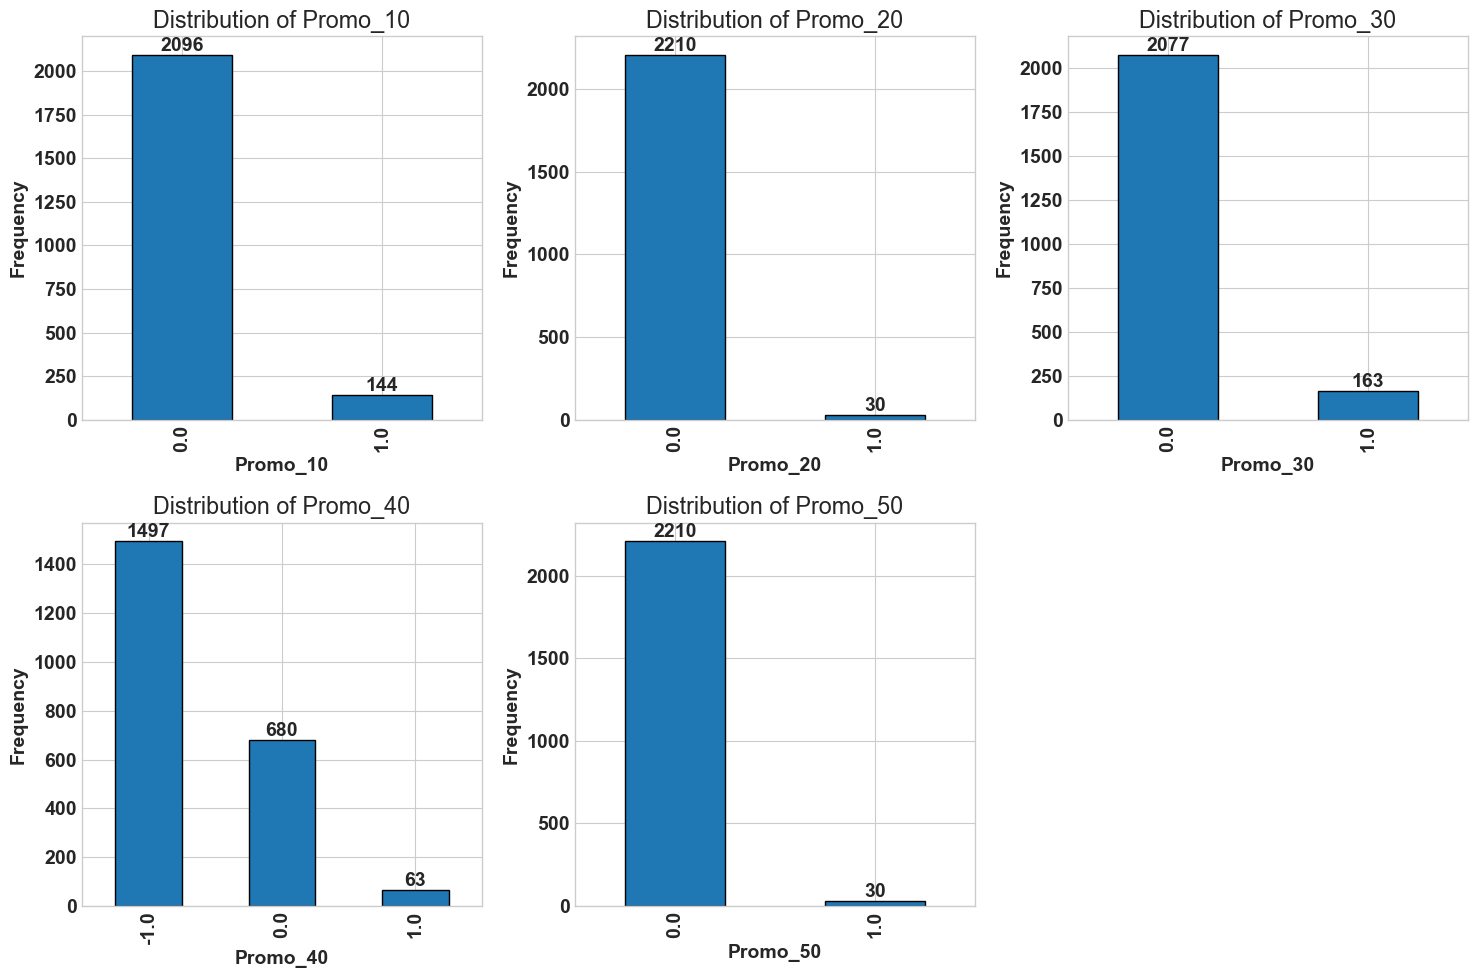

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.rcParams['font.family'] = 'sans-serif'
promo_columns = ['Promo_10', 'Promo_20', 'Promo_30', 'Promo_40', 'Promo_50']
for i, column in enumerate(promo_columns, 1):
    plt.subplot(2, 3, i)
    value_counts = raw_data[column].value_counts().sort_index()
    value_counts.plot(kind='bar', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Add data labels
    for index, value in enumerate(value_counts):
        plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [86]:
raw_data['Promo_40'] = raw_data['Promo_40'].replace(-1, 0)

**Promo_40 currently has three values: -1, 0, and 1. Based on the distribution of the other Promo fields, it is observed that the value 0 is the most common. Therefore, we will convert the value -1 to 0.**

In [89]:
raw_data[['Marital_Status', 'Number_Of_Kids']] = raw_data['Living_With'].apply(lambda x: pd.Series(x.split('_'), index = ['Marital_Status', 'Number_Of_Kids']))
raw_data['Total_Spending'] = raw_data[['Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery']].sum(axis=1)
raw_data['Age'] = 2024 - raw_data['Year_Of_Birth']
raw_data['Age_Groups'] = pd.cut(raw_data['Age'], 
                               bins=[0, 29, 39, 49], 
                               labels=['Dưới 30 tuổi', '30 - 39 tuổi', '40 - 49 tuổi'], 
                               right=False)
raw_data['Income_Groups'] = pd.cut(raw_data['Income'], 
                                  bins=[-float('inf'), 25000, 45000, 65000, 85000, float('inf')], 
                                  labels=['Dưới $25,000', '$25,000 - $45,000', '$45,000 - $65,000', '$65,000 - $85,000', 'Trên $85,000'], 
                                  right=False)
raw_data.head()

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_Visits_Month,Promo_30,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Gender,Phone,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method,Marital_Status,Number_Of_Kids,Total_Spending,Age,Age_Groups,Income_Groups
0,1001,1994.0000,Graduation,61074.0000,2021-08-17,37.0000,790.0000,2.0000,133.0000,0.0000,28.0000,152.0000,7.0000,11.0000,5.0000,8.0000,7.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Other,84120361225.0000,2021,8,31.0000,Married_1,Card,Married,1,1105.0000,30.0000,30 - 39 tuổi,"$45,000 - $65,000"
1,1002,1989.0000,Graduation,60093.0000,2022-06-26,92.0000,503.0000,14.0000,109.0000,16.0000,6.0000,90.0000,2.0000,7.0000,2.0000,10.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Male,84948328015.0000,2022,6,21.0000,Married_1,Mobile,Married,1,738.0000,35.0000,30 - 39 tuổi,"$45,000 - $65,000"
2,1005,1978.0000,2n Cycle,79689.0000,2022-05-12,65.0000,312.0000,28.0000,640.0000,180.0000,37.0000,121.0000,1.0000,4.0000,9.0000,13.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Female,84440283305.0000,2022,5,27.0000,Single_0,Online,Single,0,1318.0000,46.0000,40 - 49 tuổi,"$65,000 - $85,000"
3,1006,1987.0000,Master,41021.0000,2021-12-30,12.0000,15.0000,9.0000,9.0000,6.0000,16.0000,12.0000,2.0000,2.0000,0.0000,3.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Female,84940063568.0000,2021,12,7.0000,Together_1,Online,Together,1,67.0000,37.0000,30 - 39 tuổi,"$25,000 - $45,000"
4,1007,1996.0000,PhD,57333.0000,2021-09-22,55.0000,942.0000,16.0000,397.0000,76.0000,58.0000,176.0000,11.0000,8.0000,5.0000,9.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Male,84339387894.0000,2021,9,33.0000,Divorced_1,Card,Divorced,1,1665.0000,28.0000,Dưới 30 tuổi,"$45,000 - $65,000"


### EDA

In [93]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2240 non-null   int64         
 1   Year_Of_Birth          2240 non-null   float64       
 2   Academic_Level         2240 non-null   object        
 3   Income                 2240 non-null   float64       
 4   Registration_Time      2240 non-null   datetime64[ns]
 5   Recency                2240 non-null   float64       
 6   Liquor                 2240 non-null   float64       
 7   Vegetables             2240 non-null   float64       
 8   Pork                   2240 non-null   float64       
 9   Seafood                2240 non-null   float64       
 10  Candy                  2240 non-null   float64       
 11  Jewellery              2240 non-null   float64       
 12  Num_Deals_Purchases    2240 non-null   float64       
 13  Num

In [94]:
raw_data.describe()

,ID,Year_Of_Birth,Income,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_Visits_Month,Promo_30,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Phone,Year_Register,Month_Register,Total_Purchase,Total_Spending,Age
count,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000,2240.0000
mean,5490.5375,1987.9348,52223.5068,49.1094,304.9357,28.3022,166.9500,37.5254,27.0629,44.0219,2.3250,4.0848,2.6621,5.7902,5.3165,0.0728,0.0281,0.0134,0.0643,0.0134,0.0094,84500003236.8509,2022.0281,6.4674,14.8621,608.7982,36.0652
std,2595.4877,4.9745,25088.6477,28.9625,336.5974,39.7734,225.7154,54.6290,41.2805,52.1674,1.9322,2.7787,2.9231,3.2510,2.4266,0.2598,0.1654,0.1150,0.2453,0.1150,0.0964,283544538.7549,0.6846,3.4867,7.6772,602.2493,4.9745
min,1001.0000,1975.0000,1730.0000,0.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,84000048859.0000,2021.0000,1.0000,0.0000,8.0000,22.0000
25%,3251.7500,1985.0000,35502.5000,24.0000,24.7500,3.0000,16.0000,3.0000,1.0000,9.0000,1.0000,2.0000,0.0000,3.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,84252928790.5000,2022.0000,3.0000,8.0000,71.7500,33.0000
50%,5509.5000,1988.0000,51342.0000,49.0000,174.5000,10.0000,67.0000,12.0000,8.0000,24.0000,2.0000,4.0000,2.0000,5.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,84503824742.0000,2022.0000,6.0000,15.0000,399.0000,36.0000
75%,7732.7500,1991.0000,68413.2500,74.0000,505.2500,35.0000,232.0000,50.0000,33.0000,56.0000,3.0000,6.0000,4.0000,8.0000,7.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,84743414187.0000,2022.0000,10.0000,21.0000,1048.5000,39.0000
max,9997.0000,2002.0000,666666.0000,99.0000,1494.0000,201.0000,1725.0000,259.0000,263.0000,362.0000,15.0000,27.0000,28.0000,13.0000,20.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,84998891229.0000,2023.0000,12.0000,44.0000,2528.0000,49.0000


### *Overview of some business information*

In [96]:
total_customers = raw_data['ID'].count()
total_revenue = raw_data['Total_Spending'].sum()
average_recency = raw_data['Recency'].mean()
average_frequency = raw_data['Total_Purchase'].mean()
average_monetary = raw_data['Total_Spending'].mean()

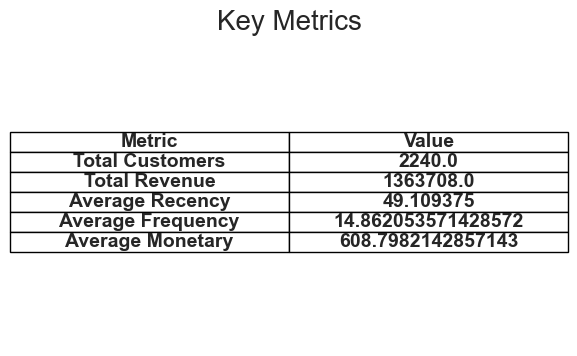

In [115]:
metrics = {
    'Total Customers': total_customers,
    'Total Revenue': total_revenue,
    'Average Recency': average_recency,
    'Average Frequency': average_frequency,
    'Average Monetary': average_monetary
}
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')
tbl = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
tbl.scale(1.2, 1.2)

plt.title('Key Metrics', fontsize=20)
plt.show()

**Liquor and Pork are the two products that account for 80% of the revenue.**

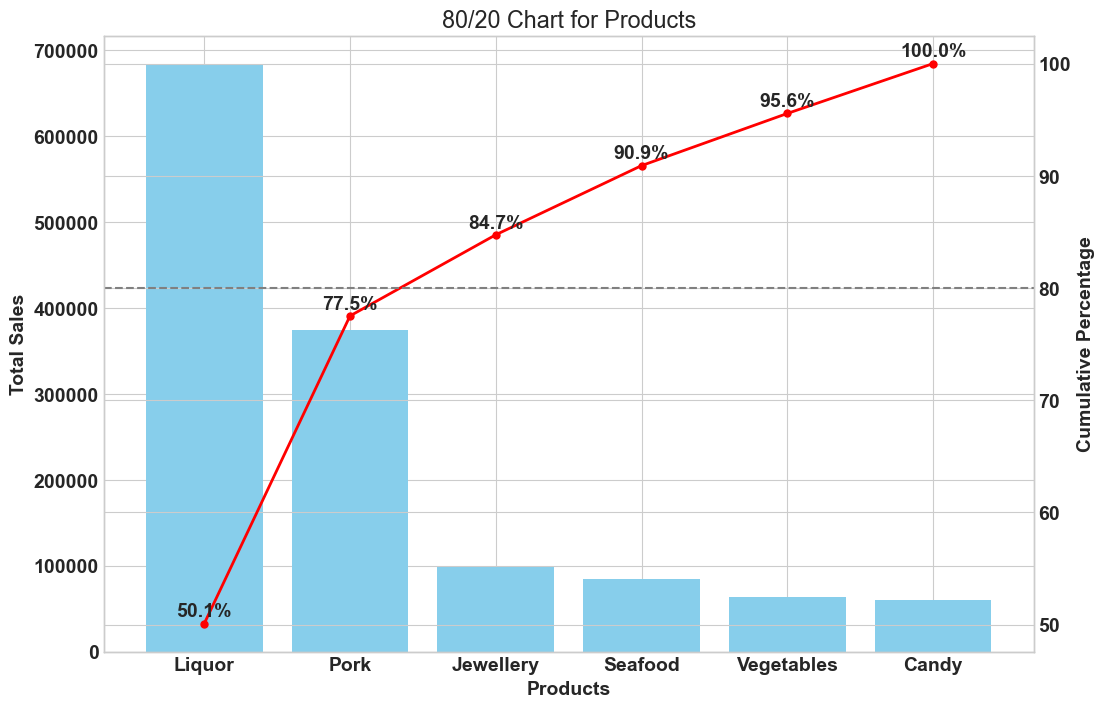

In [121]:
products = ['Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery']

product_sales = raw_data[products].sum().sort_values(ascending=False)

cumulative_sales = product_sales.cumsum() / product_sales.sum() * 100

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(product_sales.index, product_sales, color='skyblue')
ax2 = ax.twinx()
ax2.plot(cumulative_sales.index, cumulative_sales, color='red', marker='o', linestyle='-', linewidth=2, markersize=5)
ax2.axhline(y=80, color='gray', linestyle='--')

for i, txt in enumerate(cumulative_sales):
    ax2.annotate(f'{txt:.1f}%', (cumulative_sales.index[i], cumulative_sales[i]), textcoords="offset points", xytext=(0,5), ha='center')

ax.set_xlabel('Products')
ax.set_ylabel('Total Sales')
ax2.set_ylabel('Cumulative Percentage')
plt.title('80/20 Chart for Products')
plt.show()

**In the chart, Store is the location with the highest purchase rate. However, both Web and Catalog have the final destination as the website, making the website the most attractive channel for customers overall.**

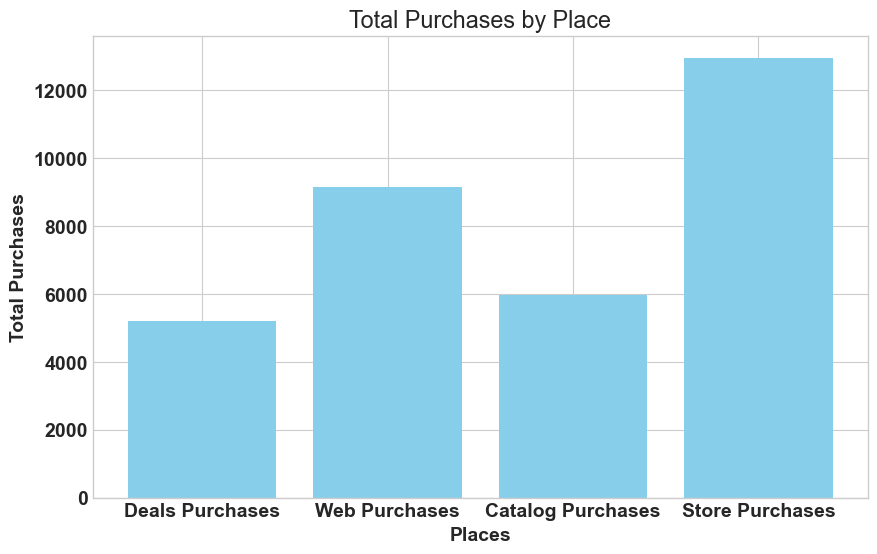

In [123]:
num_deals_purchases = raw_data['Num_Deals_Purchases'].sum()
num_web_purchases = raw_data['Num_Web_Purchases'].sum()
num_catalog_purchases = raw_data['Num_Catalog_Purchases'].sum()
num_store_purchases = raw_data['Num_Store_Purchases'].sum()

purchases = {
    'Deals Purchases': num_deals_purchases,
    'Web Purchases': num_web_purchases,
    'Catalog Purchases': num_catalog_purchases,
    'Store Purchases': num_store_purchases
}

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(purchases.keys(), purchases.values(), color='skyblue')
ax.set_xlabel('Places')
ax.set_ylabel('Total Purchases')
plt.title('Total Purchases by Place')
plt.show()

## DATA MODELING

### KMeans Clustering

In [124]:
df = raw_data

In [125]:
from sklearn.preprocessing import StandardScaler

features = ['Recency', 'Total_Spending', 'Total_Purchase']

# Extract the features from the dataframe
X = df[features]

# Handle missing values if any (for simplicity, we will fill them with the mean of the column)
X = X.fillna(X.mean())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a dataframe for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Display the first few rows of the standardized data
X_scaled_df.head()

,Recency,Total_Spending,Total_Purchase
0,-0.4182,0.8241,2.1025
1,1.4812,0.2146,0.7997
2,0.5488,1.1779,1.5814
3,-1.2816,-0.8998,-1.0243
4,0.2034,1.7542,2.3631


**Looking at the Elbow chart, it can be seen that the optimal number of clusters might be 3.**

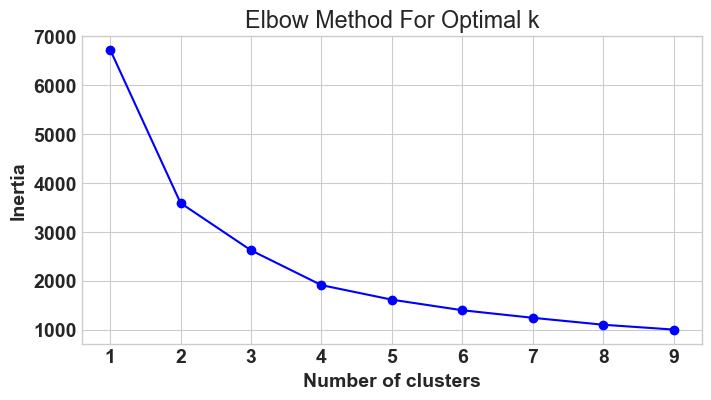

In [126]:
from sklearn.cluster import KMeans
plt.rcParams['font.family'] = 'sans-serif'
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [127]:
#build 3 clusters for recency and add it to dataframe
tx_user = df
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,730.0000,82.9356,9.3735,67.0000,75.0000,83.0000,91.0000,99.0000
1,730.0000,50.2781,9.3237,34.0000,42.0000,51.0000,57.7500,66.0000
2,780.0000,16.3577,9.9899,0.0000,8.0000,16.0000,25.0000,33.0000


In [128]:
#k-means
tx_user['Frequency'] = df['Total_Purchase']
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

#order the frequency cluster
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

#see details of each cluster
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,969.0000,7.3013,2.5361,0.0000,5.0000,7.0000,9.0000,12.0000
1,759.0000,17.4651,2.3765,13.0000,16.0000,17.0000,19.0000,21.0000
2,512.0000,25.3125,3.1299,22.0000,23.0000,25.0000,27.0000,44.0000


In [129]:
#apply clustering
tx_user['Revenue'] = df['Total_Spending']
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])


#order the cluster numbers
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

#show details of the dataframe
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,1271.0000,155.5618,146.1494,8.0000,47.0000,84.0000,244.0000,538.0000
1,607.0000,923.1400,211.8202,544.0000,737.5000,932.0000,1104.0000,1298.0000
2,362.0000,1673.0470,271.9407,1301.0000,1456.5000,1619.5000,1835.0000,2528.0000


In [130]:
def assign_segment(row):
    recency = row['RecencyCluster']
    frequency = row['FrequencyCluster']
    revenue = row['RevenueCluster']

    if recency == 2 and frequency == 2 and revenue == 2:
        return 'Champions'
    elif (recency == 2 and frequency == 2 and revenue == 1) or (recency == 2 and frequency == 1 and revenue == 2):
        return 'Loyal Customers'
    elif frequency == 2 and recency in [1, 2] and revenue in [1, 2]:
        return 'Potential Loyalists'
    elif recency == 0 and revenue == 2 or (recency in [1, 2] and revenue == 2 and frequency == 0):
        return 'At Risk Customers'
    elif frequency == 2 and revenue in [0, 1]:
        return 'Promising Customers'
    else:
        return 'Need Attention'
tx_user['Segment'] = tx_user.apply(assign_segment, axis=1)
tx_user.head()

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_Visits_Month,Promo_30,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Gender,Phone,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method,Marital_Status,Number_Of_Kids,Total_Spending,Age,Age_Groups,Income_Groups,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,Segment
0,1001,1994.0000,Graduation,61074.0000,2021-08-17,37.0000,790.0000,2.0000,133.0000,0.0000,28.0000,152.0000,7.0000,11.0000,5.0000,8.0000,7.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Other,84120361225.0000,2021,8,31.0000,Married_1,Card,Married,1,1105.0000,30.0000,30 - 39 tuổi,"$45,000 - $65,000",1,31.0000,2,1105.0000,1,Potential Loyalists
1,1007,1996.0000,PhD,57333.0000,2021-09-22,55.0000,942.0000,16.0000,397.0000,76.0000,58.0000,176.0000,11.0000,8.0000,5.0000,9.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Male,84339387894.0000,2021,9,33.0000,Divorced_1,Card,Divorced,1,1665.0000,28.0000,Dưới 30 tuổi,"$45,000 - $65,000",1,27.0000,2,738.0000,1,Potential Loyalists
2,1202,1980.0000,Master,10979.0000,2023-05-22,34.0000,9.0000,6.0000,10.0000,2.0000,2.0000,4.0000,2.0000,3.0000,0.0000,3.0000,5.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Male,84909264656.0000,2023,5,8.0000,Divorced_0,Mobile,Divorced,0,33.0000,44.0000,40 - 49 tuổi,"Dưới $25,000",1,26.0000,2,1218.0000,1,Potential Loyalists
3,1224,1981.0000,Graduation,50737.0000,2022-05-11,61.0000,79.0000,2.0000,11.0000,0.0000,0.0000,10.0000,1.0000,2.0000,0.0000,4.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Female,84407541669.0000,2022,5,7.0000,Married_1,Cash,Married,1,102.0000,43.0000,40 - 49 tuổi,"$45,000 - $65,000",1,25.0000,2,929.0000,1,Potential Loyalists
4,1732,1983.0000,Graduation,41850.0000,2021-12-24,51.0000,54.0000,7.0000,19.0000,2.0000,13.0000,4.0000,3.0000,3.0000,0.0000,3.0000,8.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Female,84578291771.0000,2021,12,9.0000,Married_2,Card,Married,2,99.0000,41.0000,40 - 49 tuổi,"$25,000 - $45,000",1,23.0000,2,828.0000,1,Potential Loyalists


In [138]:
segment_summary = tx_user.groupby('Segment').agg(
    No_Customers=('ID', 'nunique'),
    Recency=('Recency', 'mean'),
    Frequency=('Frequency', 'mean'),
    Monetary=('Revenue', 'mean'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()
segment_summary

,Segment,No_Customers,Recency,Frequency,Monetary,Total_Revenue
0,At Risk Customers,215,58.4186,11.4605,1700.0512,365511.0000
1,Champions,28,13.6786,25.0714,1650.8929,46225.0000
2,Loyal Customers,101,18.0198,21.9208,1241.0099,125342.0000
3,Need Attention,1491,48.8444,11.8484,446.6881,666012.0000
4,Potential Loyalists,65,48.1385,25.6154,1143.8769,74352.0000
5,Promising Customers,340,56.7235,25.2353,253.7235,86266.0000


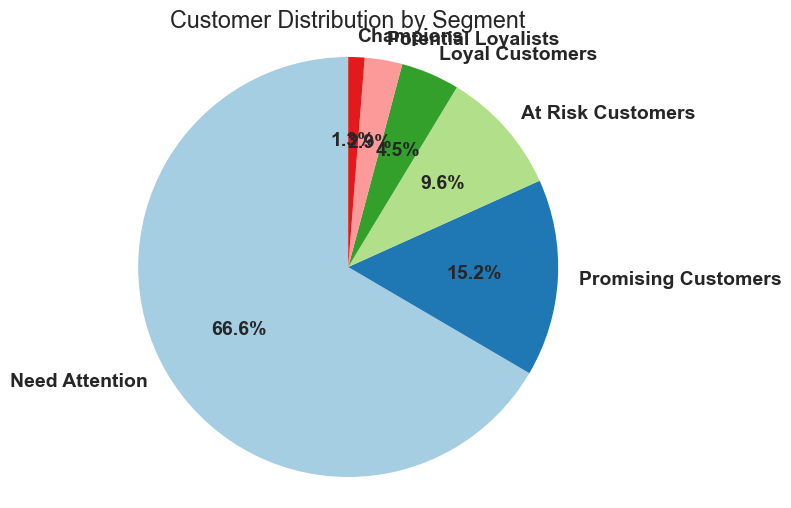

In [152]:
segment_customer_count = tx_user['Segment'].value_counts()
segment_customer_percentage = segment_customer_count / segment_customer_count.sum() * 100

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(segment_customer_percentage, labels=segment_customer_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(segment_customer_percentage))))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Customer Distribution by Segment')
plt.show()

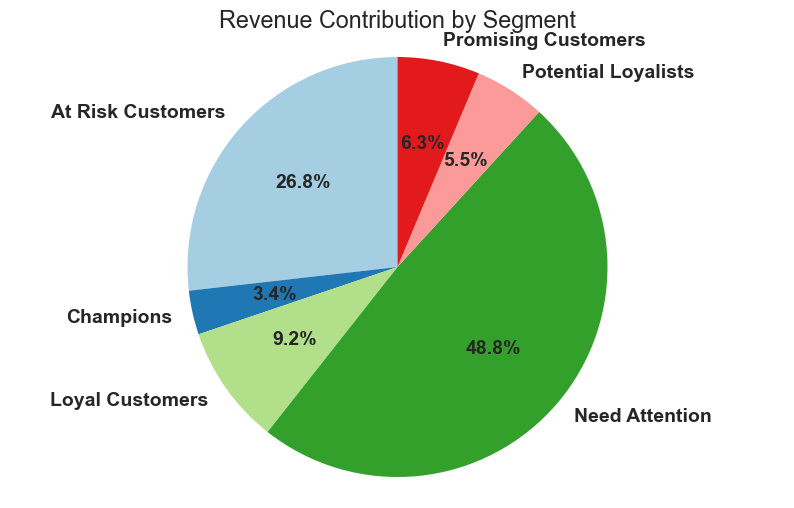

In [154]:
segment_revenue_contribution = tx_user.groupby('Segment')['Revenue'].sum()
segment_revenue_percentage = segment_revenue_contribution / segment_revenue_contribution.sum() * 100

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(segment_revenue_percentage, labels=segment_revenue_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(segment_revenue_percentage))))
ax.axis('equal')  
plt.title('Revenue Contribution by Segment')
plt.show()

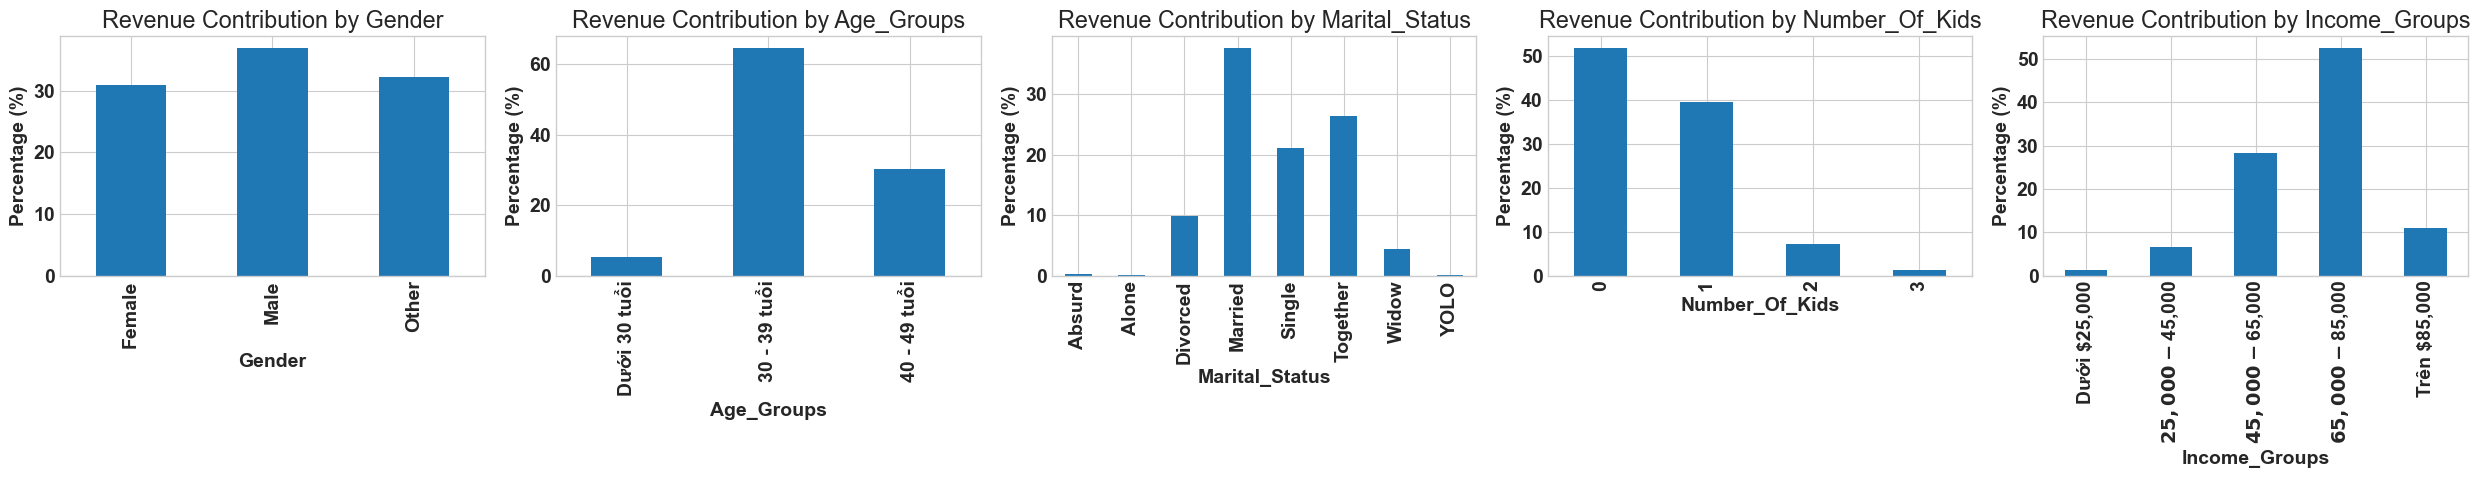

In [144]:
fields_to_plot = ['Gender', 'Age_Groups', 'Marital_Status', 'Number_Of_Kids', 'Income_Groups']

fig, axes = plt.subplots(nrows=1, ncols=len(fields_to_plot), figsize=(25, 5))

for ax, field in zip(axes, fields_to_plot):
    revenue_contribution = need_attention_segment.groupby(field)['Total_Spending'].sum()
    revenue_contribution_percentage = revenue_contribution / revenue_contribution.sum() * 100
    revenue_contribution_percentage.plot(kind='bar', ax=ax, title=f'Revenue Contribution by {field}')
    ax.set_ylabel('Percentage (%)')

plt.tight_layout()
plt.show()

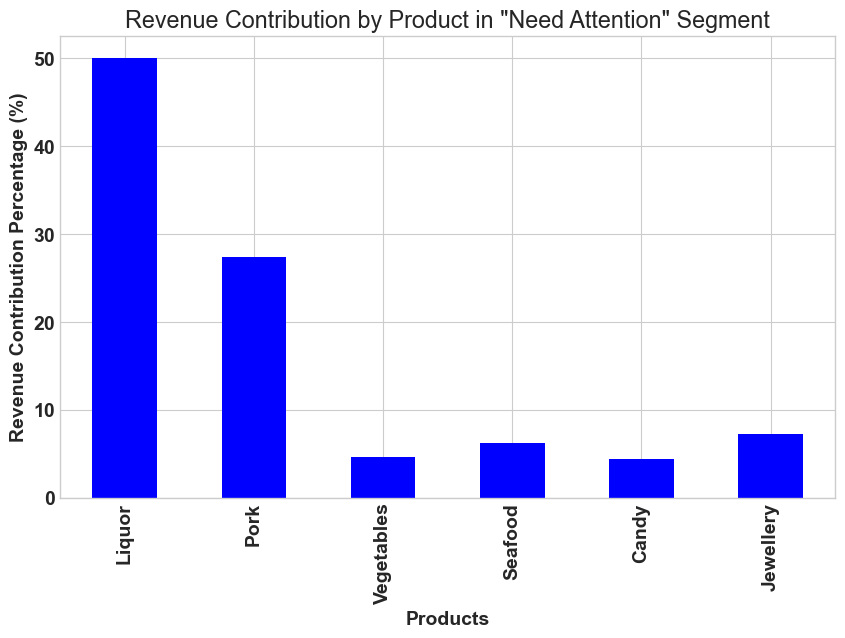

In [147]:
product_fields = ['Liquor', 'Pork','Vegetables', 'Seafood', 'Candy', 'Jewellery']

product_revenue_contribution = need_attention_segment[product_fields].sum()
product_revenue_percentage = product_revenue_contribution / product_revenue_contribution.sum() * 100

fig, ax = plt.subplots(figsize=(10, 6))
product_revenue_percentage.plot(kind='bar', ax=ax, color='blue')
ax.set_xlabel('Products')
ax.set_ylabel('Revenue Contribution Percentage (%)')
plt.title('Revenue Contribution by Product in "Need Attention" Segment')
plt.show()

## PROMOTION

In [155]:
data = tx_user
data.head()

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_Visits_Month,Promo_30,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Gender,Phone,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method,Marital_Status,Number_Of_Kids,Total_Spending,Age,Age_Groups,Income_Groups,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,Segment
0,1001,1994.0000,Graduation,61074.0000,2021-08-17,37.0000,790.0000,2.0000,133.0000,0.0000,28.0000,152.0000,7.0000,11.0000,5.0000,8.0000,7.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Other,84120361225.0000,2021,8,31.0000,Married_1,Card,Married,1,1105.0000,30.0000,30 - 39 tuổi,"$45,000 - $65,000",1,31.0000,2,1105.0000,1,Potential Loyalists
1,1007,1996.0000,PhD,57333.0000,2021-09-22,55.0000,942.0000,16.0000,397.0000,76.0000,58.0000,176.0000,11.0000,8.0000,5.0000,9.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Male,84339387894.0000,2021,9,33.0000,Divorced_1,Card,Divorced,1,1665.0000,28.0000,Dưới 30 tuổi,"$45,000 - $65,000",1,27.0000,2,738.0000,1,Potential Loyalists
2,1202,1980.0000,Master,10979.0000,2023-05-22,34.0000,9.0000,6.0000,10.0000,2.0000,2.0000,4.0000,2.0000,3.0000,0.0000,3.0000,5.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Male,84909264656.0000,2023,5,8.0000,Divorced_0,Mobile,Divorced,0,33.0000,44.0000,40 - 49 tuổi,"Dưới $25,000",1,26.0000,2,1218.0000,1,Potential Loyalists
3,1224,1981.0000,Graduation,50737.0000,2022-05-11,61.0000,79.0000,2.0000,11.0000,0.0000,0.0000,10.0000,1.0000,2.0000,0.0000,4.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Female,84407541669.0000,2022,5,7.0000,Married_1,Cash,Married,1,102.0000,43.0000,40 - 49 tuổi,"$45,000 - $65,000",1,25.0000,2,929.0000,1,Potential Loyalists
4,1732,1983.0000,Graduation,41850.0000,2021-12-24,51.0000,54.0000,7.0000,19.0000,2.0000,13.0000,4.0000,3.0000,3.0000,0.0000,3.0000,8.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Female,84578291771.0000,2021,12,9.0000,Married_2,Card,Married,2,99.0000,41.0000,40 - 49 tuổi,"$25,000 - $45,000",1,23.0000,2,828.0000,1,Potential Loyalists


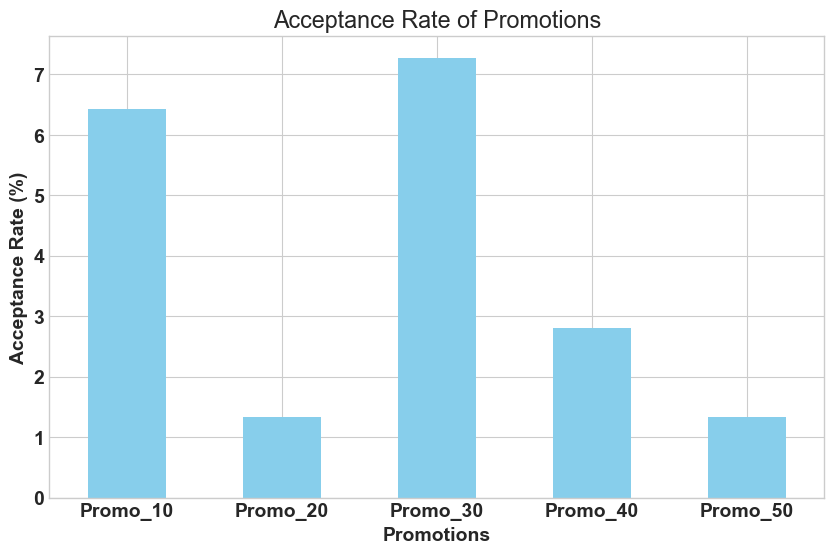

In [170]:
promo_columns = ['Promo_10', 'Promo_20', 'Promo_30', 'Promo_40', 'Promo_50']

promo_acceptance_rate = data[promo_columns].mean() * 100

fig, ax = plt.subplots(figsize=(10, 6))
promo_acceptance_rate.plot(kind='bar', ax=ax, color='skyblue')
ax.set_xlabel('Promotions')
ax.set_ylabel('Acceptance Rate (%)')
ax.set_title('Acceptance Rate of Promotions')
plt.xticks(rotation=0)
plt.show()

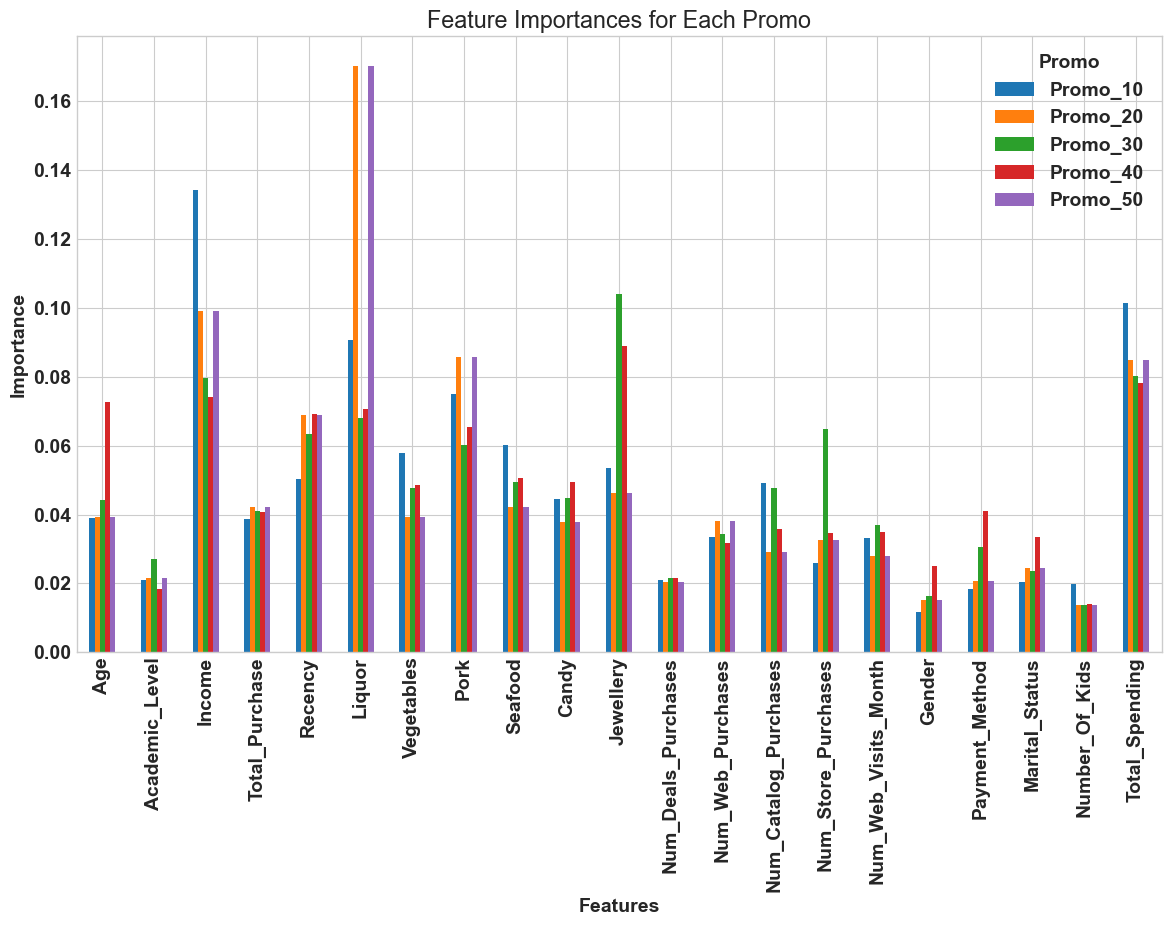

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

features = ['Age', 'Academic_Level', 'Income', 'Total_Purchase', 'Recency','Liquor','Vegetables','Pork','Seafood',
            'Candy','Jewellery','Num_Deals_Purchases','Num_Web_Purchases','Num_Catalog_Purchases','Num_Store_Purchases',
            'Num_Web_Visits_Month','Gender','Payment_Method','Marital_Status','Number_Of_Kids','Total_Spending']

data_encoded = data.copy()
label_encoder = LabelEncoder()
data_encoded['Academic_Level'] = label_encoder.fit_transform(data_encoded['Academic_Level'])
data_encoded['Gender'] = label_encoder.fit_transform(data_encoded['Gender'])
data_encoded['Payment_Method'] = label_encoder.fit_transform(data_encoded['Payment_Method'])
data_encoded['Marital_Status'] = label_encoder.fit_transform(data_encoded['Marital_Status'])

promo_cols_only = ['Promo_10','Promo_20','Promo_30','Promo_40','Promo_50']

feature_importances = {}

for promo in promo_cols_only:
    target = data_encoded[promo]
    
    X = data_encoded[features]
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    model.fit(X, target)
    
    importances = model.feature_importances_
    
    feature_importances[promo] = importances

feature_importances_df = pd.DataFrame(feature_importances, index=features)

# Visualize feature importances for each promo
feature_importances_df.plot(kind='bar', figsize=(14, 8))
plt.title('Feature Importances for Each Promo')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend(title='Promo')
plt.show()


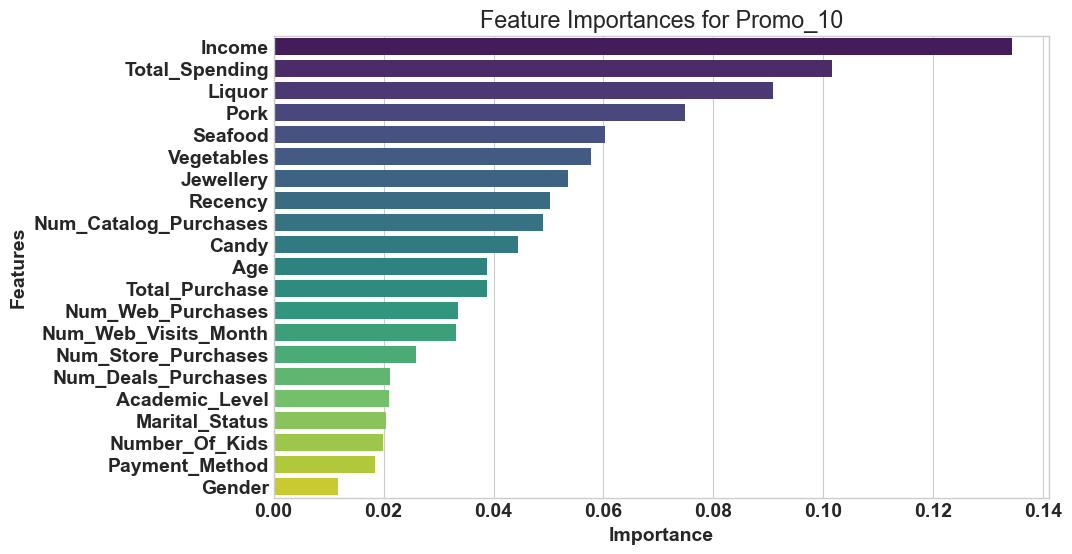

In [157]:
sorted_importances = feature_importances_df['Promo_10'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='viridis')
plt.title('Feature Importances for Promo_10')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

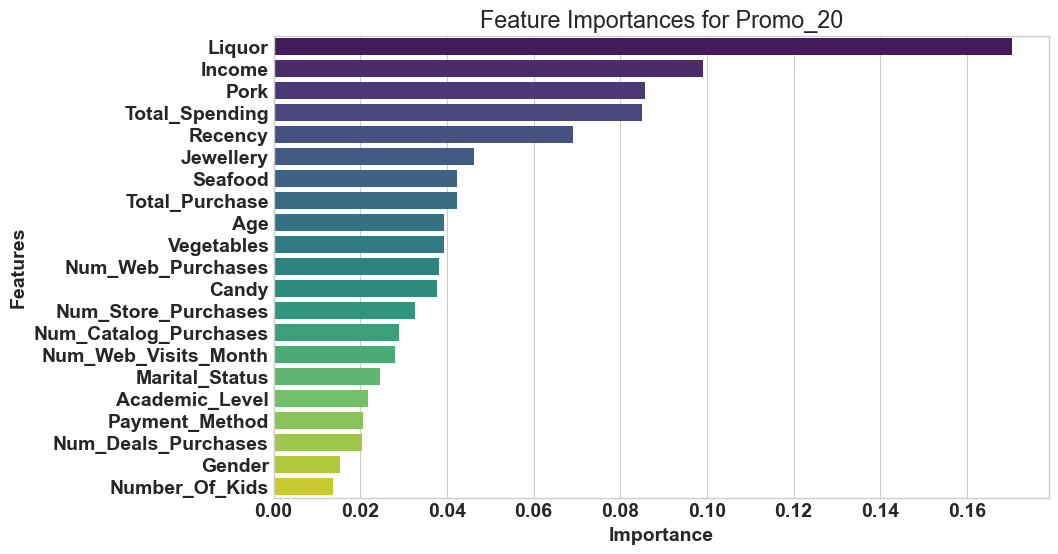

In [158]:
sorted_importances = feature_importances_df['Promo_20'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='viridis')
plt.title('Feature Importances for Promo_20')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

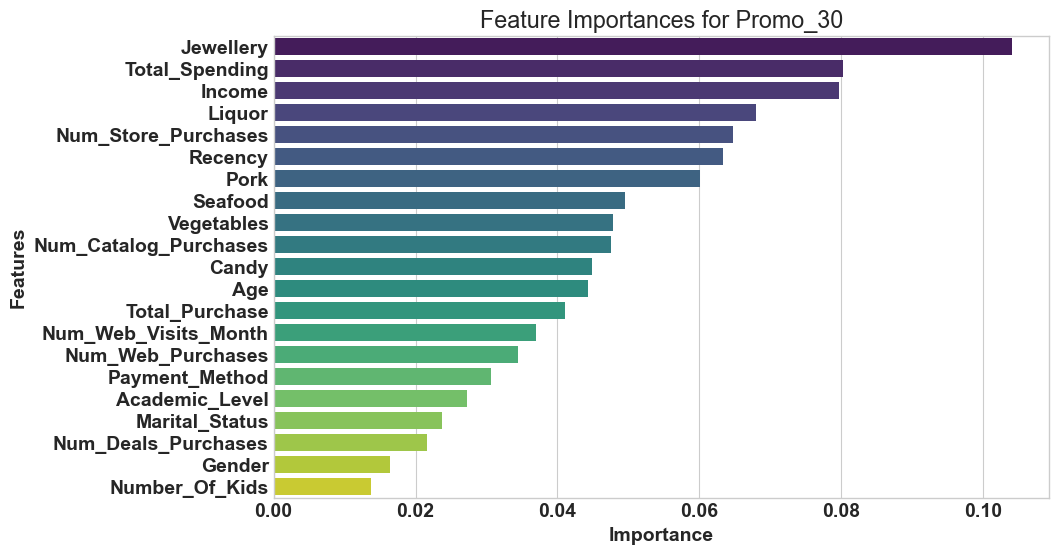

In [159]:
sorted_importances = feature_importances_df['Promo_30'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='viridis')
plt.title('Feature Importances for Promo_30')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

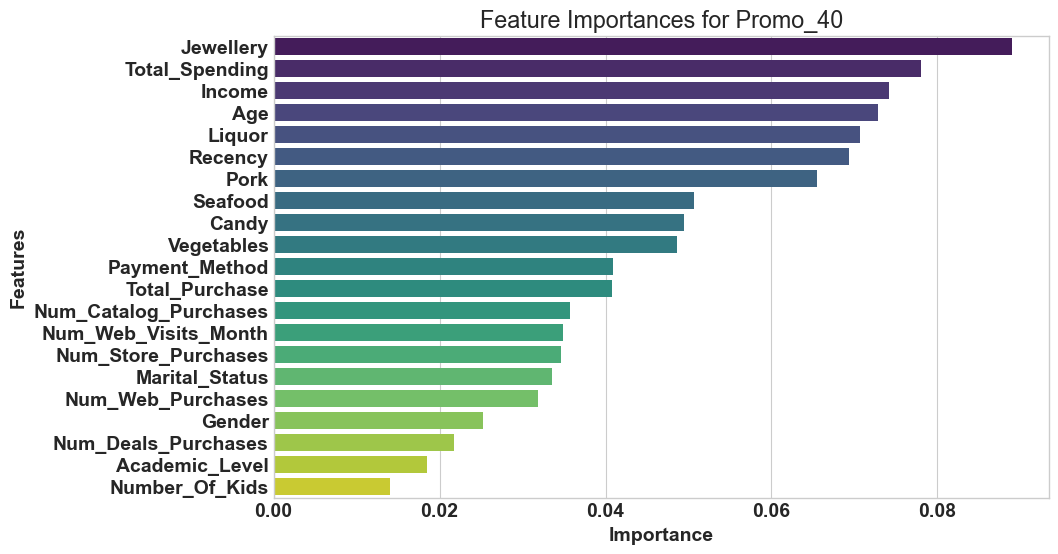

In [160]:
sorted_importances = feature_importances_df['Promo_40'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='viridis')
plt.title('Feature Importances for Promo_40')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

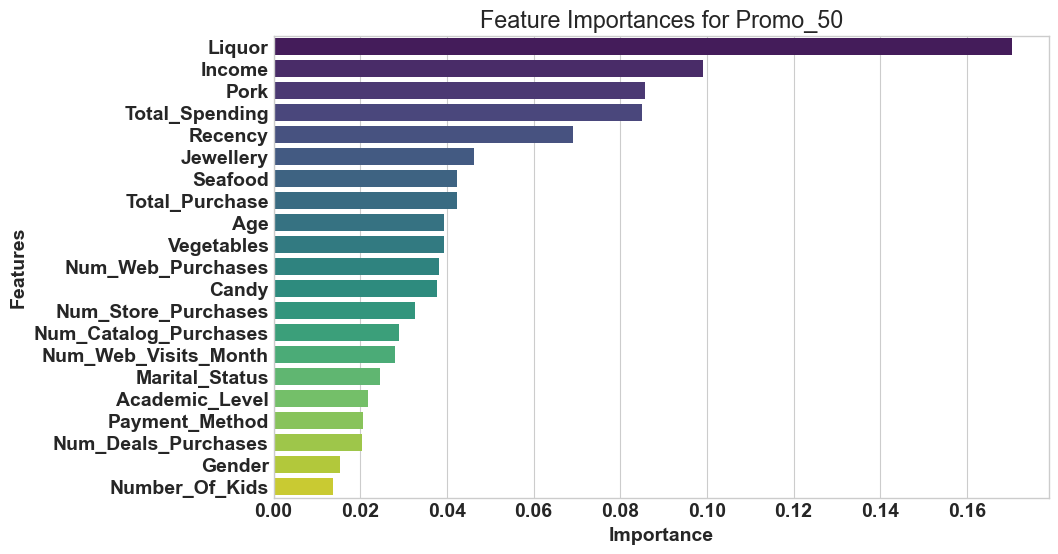

In [161]:
sorted_importances = feature_importances_df['Promo_50'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='viridis')
plt.title('Feature Importances for Promo_50')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Which factors affect the probabilities to participate a promotion program?

In [163]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

In [164]:
raw_data = data
raw_data.head()

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_Visits_Month,Promo_30,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Gender,Phone,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method,Marital_Status,Number_Of_Kids,Total_Spending,Age,Age_Groups,Income_Groups,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,Segment
0,1001,1994.0000,Graduation,61074.0000,2021-08-17,37.0000,790.0000,2.0000,133.0000,0.0000,28.0000,152.0000,7.0000,11.0000,5.0000,8.0000,7.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Other,84120361225.0000,2021,8,31.0000,Married_1,Card,Married,1,1105.0000,30.0000,30 - 39 tuổi,"$45,000 - $65,000",1,31.0000,2,1105.0000,1,Potential Loyalists
1,1007,1996.0000,PhD,57333.0000,2021-09-22,55.0000,942.0000,16.0000,397.0000,76.0000,58.0000,176.0000,11.0000,8.0000,5.0000,9.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Male,84339387894.0000,2021,9,33.0000,Divorced_1,Card,Divorced,1,1665.0000,28.0000,Dưới 30 tuổi,"$45,000 - $65,000",1,27.0000,2,738.0000,1,Potential Loyalists
2,1202,1980.0000,Master,10979.0000,2023-05-22,34.0000,9.0000,6.0000,10.0000,2.0000,2.0000,4.0000,2.0000,3.0000,0.0000,3.0000,5.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Male,84909264656.0000,2023,5,8.0000,Divorced_0,Mobile,Divorced,0,33.0000,44.0000,40 - 49 tuổi,"Dưới $25,000",1,26.0000,2,1218.0000,1,Potential Loyalists
3,1224,1981.0000,Graduation,50737.0000,2022-05-11,61.0000,79.0000,2.0000,11.0000,0.0000,0.0000,10.0000,1.0000,2.0000,0.0000,4.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Female,84407541669.0000,2022,5,7.0000,Married_1,Cash,Married,1,102.0000,43.0000,40 - 49 tuổi,"$45,000 - $65,000",1,25.0000,2,929.0000,1,Potential Loyalists
4,1732,1983.0000,Graduation,41850.0000,2021-12-24,51.0000,54.0000,7.0000,19.0000,2.0000,13.0000,4.0000,3.0000,3.0000,0.0000,3.0000,8.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Female,84578291771.0000,2021,12,9.0000,Married_2,Card,Married,2,99.0000,41.0000,40 - 49 tuổi,"$25,000 - $45,000",1,23.0000,2,828.0000,1,Potential Loyalists


In [165]:
raw_data['Number_Of_Kids'] = raw_data['Number_Of_Kids'].astype(int)

In [166]:
payment_encoder = OneHotEncoder()
payment_encoder.fit(raw_data.Payment_Method.values.reshape(-1, 1))
raw_data[payment_encoder.categories_[0].tolist()] = payment_encoder.transform(raw_data.Payment_Method.values.reshape(-1, 1)).toarray()

In [167]:
raw_data[edu_encoder.categories_[0].tolist()] = edu_encoder.transform(raw_data.Academic_Level.values.reshape(-1, 1)).toarray()
raw_data[gender_encoder.categories_[0].tolist()] = gender_encoder.transform(raw_data.Gender.values.reshape(-1, 1)).toarray()
raw_data[marital_status_encoder.categories_[0].tolist()] = marital_status_encoder.transform(raw_data.Marital_Status.values.reshape(-1, 1)).toarray()

In [168]:
dep_var = 'Promo_10'
indep_vars = ['Income', 'Year_Of_Birth', 'Complain', 'Recency', 'Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery',
              '2n Cycle', 'Graduation', 'Master', 'PhD', 'Female', 'Male', 'Married', 'Single', 'Together',
              'Divorced', 'Widow', 'Absurd', 'Alone', 'Number_Of_Kids', 'Num_Deals_Purchases', 'Num_Web_Purchases',
              'Num_Catalog_Purchases', 'Num_Store_Purchases', 'Num_Web_Visits_Month', 'Card', 'Cash', 'Mobile']

y = raw_data[dep_var]
X = raw_data[indep_vars]
X['intercept'] = 1
X['Year_Of_Birth'] = 2024 -  X['Year_Of_Birth']
X['Income'] = np.log(X['Income'])

model = sm.Logit(y, X)
results = model.fit()
results.summary()

         Current function value: 0.153030
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Promo_10   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2207
Method:                           MLE   Df Model:                           32
Date:                Sun, 26 May 2024   Pseudo R-squ.:                  0.3586
Time:                        19:55:28   Log-Likelihood:                -342.79
converged:                      False   LL-Null:                       -534.47
Covariance Type:            nonrobust   LLR p-value:                 8.175e-62
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    3.3804      0.717      4.712      0.000       1.974       4.787
Year_Of_Birth            -0.0204      0.021     -0.991      0.322      -0.061       0.020
Complain                -28.7732    1.8e+06  -1.59e-05      1.000   -3.54e+06    3.54e+06
Recency                  -0.0031      0.003     -0.883      0.377      -0.010       0.004
Liquor                    0.0021      0.000      6.062      0.000       0.001       0.003
Vegetables               -0.0032      0.002     -1.366      0.172      -0.008       0.001
Pork                   1.747e-05      0.000      0.036      0.972      -0.001       0.001
Seafood                   0.0034      0.002      1.987      0.047    4.61e-05       0.007
Candy                     0.0024      0.002      1.116      0.264      -0.002       0.007
Jewellery                 0.0010      0.002      0.580      0.562      -0.002       0.004
2n Cycle                 14.7306   6457.532      0.002      0.998   -1.26e+04    1.27e+04
Graduation               14.4329   6457.532      0.002      0.998   -1.26e+04    1.27e+04
Master                   13.7766   6457.532      0.002      0.998   -1.26e+04    1.27e+04
PhD                      13.8293   6457.532      0.002      0.998   -1.26e+04    1.27e+04
Female                    0.1827      0.256      0.712      0.476      -0.320       0.685
Male                      0.0919      0.246      0.373      0.709      -0.391       0.575
Married                  11.7722   2787.017      0.004      0.997   -5450.680    5474.225
Single                   11.4016   2787.017      0.004      0.997   -5451.051    5473.854
Together                 11.1707   2787.017      0.004      0.997   -5451.282    5473.623
Divorced                 11.2889   2787.017      0.004      0.997   -5451.163    5473.741
Widow                    11.4742   2787.017      0.004      0.997   -5450.978    5473.927
Absurd                   13.8339   2787.017      0.005      0.996   -5448.620    5476.287
Alone                    -9.2535   2.73e+05  -3.39e-05      1.000   -5.35e+05    5.35e+05
Number_Of_Kids           -0.5921      0.271     -2.184      0.029      -1.124      -0.061
Num_Deals_Purchases      -0.1337      0.090     -1.492      0.136      -0.309       0.042
Num_Web_Purchases         0.0457      0.043      1.054      0.292      -0.039       0.131
Num_Catalog_Purchases     0.0827      0.040      2.060      0.039       0.004       0.161
Num_Store_Purchases      -0.0270      0.035     -0.774      0.439      -0.095       0.041
Num_Web_Visits_Month      0.1179      0.075      1.576      0.115      -0.029       0.264
Card                     -0.1926      0.285     -0.675      0.500      -0.752       0.367
Cash                     -0.0546      0.280     -0.195      0.846      -0.604       0.495
Mobile                   -0.0746      0.268     -0.278      0.781      -0.600       0.451
intercept               -66.7480   7033.294     -0.009      0.992   -1.39e+04    1.37e+04
=

Factors affecting the acceptance rate of Promo_10: 
- Income
- Liquor
- Seafood
- Number of kids
- Num_Catalog_Purchases	

In [169]:
dep_var = 'Promo_20'
indep_vars = ['Income', 'Year_Of_Birth', 'Complain', 'Recency', 'Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery',
              '2n Cycle', 'Graduation', 'Master', 'PhD', 'Female', 'Male', 'Married', 'Single', 'Together',
              'Divorced', 'Widow', 'Absurd', 'Alone', 'Number_Of_Kids', 'Num_Deals_Purchases', 'Num_Web_Purchases',
              'Num_Catalog_Purchases', 'Num_Store_Purchases', 'Num_Web_Visits_Month', 'Card', 'Cash', 'Mobile']

y = raw_data[dep_var]
X = raw_data[indep_vars]
X['intercept'] = 1
X['Year_Of_Birth'] = 2024 -  X['Year_Of_Birth']
X['Income'] = np.log(X['Income'])

model = sm.Logit(y, X)
results = model.fit()
results.summary()

         Current function value: 0.043360
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Promo_20   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2207
Method:                           MLE   Df Model:                           32
Date:                Sun, 26 May 2024   Pseudo R-squ.:                  0.3899
Time:                        19:56:18   Log-Likelihood:                -97.127
converged:                      False   LL-Null:                       -159.19
Covariance Type:            nonrobust   LLR p-value:                 8.708e-13
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    2.2015      0.781      2.818      0.005       0.670       3.733
Year_Of_Birth            -0.0589      0.044     -1.351      0.177      -0.144       0.027
Complain                -27.7090   3.16e+06  -8.78e-06      1.000   -6.19e+06    6.19e+06
Recency                  -0.0033      0.008     -0.418      0.676      -0.018       0.012
Liquor                    0.0031      0.001      4.845      0.000       0.002       0.004
Vegetables               -0.0165      0.008     -1.948      0.051      -0.033    9.93e-05
Pork                     -0.0020      0.001     -1.452      0.146      -0.005       0.001
Seafood                  -0.0066      0.006     -1.159      0.246      -0.018       0.005
Candy                    -0.0066      0.007     -0.935      0.350      -0.020       0.007
Jewellery                 0.0020      0.004      0.535      0.593      -0.005       0.009
2n Cycle                  9.6801    467.076      0.021      0.983    -905.771     925.131
Graduation                9.6127    467.075      0.021      0.984    -905.837     925.063
Master                    8.3333    467.075      0.018      0.986    -907.118     923.784
PhD                       9.0073    467.075      0.019      0.985    -906.443     924.457
Female                    0.8445      0.520      1.625      0.104      -0.174       1.863
Male                     -0.2725      0.590     -0.462      0.644      -1.430       0.885
Married                  16.2409   6.66e+04      0.000      1.000   -1.31e+05    1.31e+05
Single                   16.5364   6.66e+04      0.000      1.000   -1.31e+05    1.31e+05
Together                 17.5958   6.66e+04      0.000      1.000   -1.31e+05    1.31e+05
Divorced                 17.5280   6.66e+04      0.000      1.000   -1.31e+05    1.31e+05
Widow                    16.4714   6.66e+04      0.000      1.000   -1.31e+05    1.31e+05
Absurd                   -6.8555   1.56e+06  -4.41e-06      1.000   -3.05e+06    3.05e+06
Alone                   -28.3688   1.29e+11   -2.2e-10      1.000   -2.53e+11    2.53e+11
Number_Of_Kids           -0.8661      0.510     -1.699      0.089      -1.865       0.133
Num_Deals_Purchases      -0.3440      0.233     -1.479      0.139      -0.800       0.112
Num_Web_Purchases        -0.2153      0.086     -2.507      0.012      -0.384      -0.047
Num_Catalog_Purchases     0.1563      0.088      1.776      0.076      -0.016       0.329
Num_Store_Purchases       0.1245      0.073      1.699      0.089      -0.019       0.268
Num_Web_Visits_Month      0.3679      0.125      2.933      0.003       0.122       0.614
Card                     -0.1428      0.686     -0.208      0.835      -1.487       1.201
Cash                      0.4424      0.572      0.774      0.439      -0.679       1.563
Mobile                    0.7506      0.562      1.335      0.182      -0.351       1.853
intercept               -54.6578   6.66e+04     -0.001      0.999   -1.31e+05    1.31e+05
=

Factors affecting the acceptance rate of Promo_20: 
- Income
- Liquor
- Vegetables
- Num_Web_Purchases	
- Num_Catalog_Purchases
- Num_Store_Purchases
- Num_Web_Visits_Month

In [42]:
dep_var = 'Promo_30'
indep_vars = ['Income', 'Year_Of_Birth', 'Complain', 'Recency', 'Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery',
              '2n Cycle', 'Graduation', 'Master', 'PhD', 'Female', 'Male', 'Married', 'Single', 'Together',
              'Divorced', 'Widow', 'Absurd', 'Alone', 'Number_Of_Kids', 'Num_Deals_Purchases', 'Num_Web_Purchases',
              'Num_Catalog_Purchases', 'Num_Store_Purchases', 'Num_Web_Visits_Month', 'Card', 'Cash', 'Mobile']

y = raw_data[dep_var]
X = raw_data[indep_vars]
X['intercept'] = 1
X['Year_Of_Birth'] = 2024 -  X['Year_Of_Birth']
X['Income'] = np.log(X['Income'])

model = sm.Logit(y, X)
results = model.fit()
results.summary()

         Current function value: 0.225745
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Promo_30   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2207
Method:                           MLE   Df Model:                           32
Date:                Sat, 25 May 2024   Pseudo R-squ.:                  0.1342
Time:                        14:56:53   Log-Likelihood:                -505.67
converged:                      False   LL-Null:                       -584.06
Covariance Type:            nonrobust   LLR p-value:                 2.205e-18
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                   -0.1131      0.252     -0.448      0.654      -0.607       0.381
Year_Of_Birth             0.0041      0.017      0.240      0.811      -0.030       0.038
Complain                  0.6046      0.781      0.774      0.439      -0.927       2.136
Recency                  -0.0061      0.003     -2.020      0.043      -0.012      -0.000
Liquor                    0.0008      0.000      2.267      0.023       0.000       0.002
Vegetables                0.0021      0.003      0.720      0.471      -0.004       0.008
Pork                     -0.0008      0.001     -1.347      0.178      -0.002       0.000
Seafood                  -0.0022      0.002     -0.963      0.336      -0.007       0.002
Candy                    -0.0007      0.003     -0.239      0.811      -0.006       0.005
Jewellery                 0.0081      0.002      4.890      0.000       0.005       0.011
2n Cycle                 -0.4093      0.548     -0.747      0.455      -1.484       0.665
Graduation               -0.6291      0.490     -1.284      0.199      -1.590       0.331
Master                   -0.5119      0.527     -0.971      0.331      -1.545       0.521
PhD                      -0.4699      0.517     -0.909      0.363      -1.483       0.543
Female                    0.5615      0.213      2.634      0.008       0.144       0.979
Male                      0.0312      0.229      0.136      0.892      -0.418       0.481
Married                  15.0497   4115.235      0.004      0.997   -8050.662    8080.761
Single                   15.0851   4115.235      0.004      0.997   -8050.627    8080.797
Together                 14.8962   4115.235      0.004      0.997   -8050.816    8080.608
Divorced                 15.1017   4115.235      0.004      0.997   -8050.610    8080.814
Widow                    14.5418   4115.235      0.004      0.997   -8051.170    8080.254
Absurd                  -10.0726   4.75e+05  -2.12e-05      1.000   -9.32e+05    9.32e+05
Alone                    17.2031   4115.235      0.004      0.997   -8048.509    8082.915
Number_Of_Kids            0.1869      0.159      1.177      0.239      -0.124       0.498
Num_Deals_Purchases      -0.1736      0.056     -3.101      0.002      -0.283      -0.064
Num_Web_Purchases         0.0110      0.034      0.318      0.751      -0.057       0.079
Num_Catalog_Purchases     0.2382      0.042      5.712      0.000       0.156       0.320
Num_Store_Purchases      -0.1848      0.042     -4.450      0.000      -0.266      -0.103
Num_Web_Visits_Month      0.1946      0.050      3.927      0.000       0.097       0.292
Card                      0.7291      0.223      3.268      0.001       0.292       1.166
Cash                      0.3366      0.242      1.388      0.165      -0.139       0.812
Mobile                    0.1363      0.252      0.540      0.589      -0.358       0.631
intercept               -17.3100   4115.236     -0.004      0.997   -8083.024    8048.404
=

Factors affecting the adoption rate of Promo_30: 
- Recency
- Liquor
- Jewellery	
- Female
- Num_Deal_Purchases
- Num_Catalog_Purchases
- Num_Store_Purchases
- Num_Web_Visits_Month
- Card

In [43]:
dep_var = 'Promo_40'
indep_vars = ['Income', 'Year_Of_Birth', 'Complain', 'Recency', 'Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery',
              '2n Cycle', 'Graduation', 'Master', 'PhD', 'Female', 'Male', 'Married', 'Single', 'Together',
              'Divorced', 'Widow', 'Absurd', 'Alone', 'Number_Of_Kids', 'Num_Deals_Purchases', 'Num_Web_Purchases',
              'Num_Catalog_Purchases', 'Num_Store_Purchases', 'Num_Web_Visits_Month', 'Card', 'Cash', 'Mobile']

y = raw_data[dep_var]
X = raw_data[indep_vars]
X['intercept'] = 1
X['Year_Of_Birth'] = 2024 -  X['Year_Of_Birth']
X['Income'] = np.log(X['Income'])

model = sm.Logit(y, X)
results = model.fit()
results.summary()

         Current function value: 0.111324
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Promo_40   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2207
Method:                           MLE   Df Model:                           32
Date:                Sat, 25 May 2024   Pseudo R-squ.:                  0.1314
Time:                        14:57:48   Log-Likelihood:                -249.37
converged:                      False   LL-Null:                       -287.08
Covariance Type:            nonrobust   LLR p-value:                 2.292e-05
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.1456      0.392      0.372      0.710      -0.622       0.914
Year_Of_Birth             0.0072      0.027      0.271      0.786      -0.045       0.059
Complain                  0.8837      1.061      0.833      0.405      -1.197       2.964
Recency                  -0.0040      0.005     -0.851      0.395      -0.013       0.005
Liquor                    0.0007      0.001      1.268      0.205      -0.000       0.002
Vegetables                0.0014      0.005      0.294      0.769      -0.008       0.010
Pork                      0.0001      0.001      0.135      0.893      -0.002       0.002
Seafood                  -0.0065      0.004     -1.659      0.097      -0.014       0.001
Candy                    -0.0061      0.005     -1.332      0.183      -0.015       0.003
Jewellery                 0.0086      0.002      3.689      0.000       0.004       0.013
2n Cycle                 -0.6759      0.933     -0.725      0.469      -2.504       1.152
Graduation               -0.4694      0.801     -0.586      0.558      -2.039       1.100
Master                   -0.2298      0.841     -0.273      0.785      -1.878       1.419
PhD                      -0.6725      0.846     -0.795      0.427      -2.330       0.985
Female                    0.7362      0.331      2.224      0.026       0.087       1.385
Male                      0.0224      0.371      0.060      0.952      -0.706       0.750
Married                   7.5189    168.317      0.045      0.964    -322.376     337.414
Single                    7.5425    168.317      0.045      0.964    -322.353     337.438
Together                  7.1383    168.317      0.042      0.966    -322.757     337.034
Divorced                  7.4648    168.317      0.044      0.965    -322.431     337.360
Widow                     7.2622    168.318      0.043      0.966    -322.636     337.160
Absurd                   -6.1666   3242.670     -0.002      0.998   -6361.683    6349.350
Alone                    10.4821    168.321      0.062      0.950    -319.422     340.386
Number_Of_Kids           -0.0727      0.258     -0.282      0.778      -0.579       0.434
Num_Deals_Purchases      -0.2160      0.102     -2.113      0.035      -0.416      -0.016
Num_Web_Purchases         0.0507      0.048      1.058      0.290      -0.043       0.145
Num_Catalog_Purchases     0.1458      0.061      2.401      0.016       0.027       0.265
Num_Store_Purchases      -0.1740      0.064     -2.716      0.007      -0.299      -0.048
Num_Web_Visits_Month      0.1535      0.071      2.150      0.032       0.014       0.293
Card                      0.7483      0.370      2.023      0.043       0.023       1.473
Cash                      0.6645      0.374      1.776      0.076      -0.069       1.398
Mobile                    0.6366      0.376      1.691      0.091      -0.101       1.374
intercept               -13.3411    168.372     -0.079      0.937    -343.344     316.662
=

Factors affecting the adoption rate of Promo_40
- Jewellery	
- Female
- Num_Deal_Purchases
- Num_Catalog_Purchases
- Num_Store_Purchases
- Num_Web_Visits_Month
- Card
- Cash
- Mobile

In [44]:
dep_var = 'Promo_50'
indep_vars = ['Income', 'Year_Of_Birth', 'Complain', 'Recency', 'Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery',
              '2n Cycle', 'Graduation', 'Master', 'PhD', 'Female', 'Male', 'Married', 'Single', 'Together',
              'Divorced', 'Widow', 'Absurd', 'Alone', 'Number_Of_Kids', 'Num_Deals_Purchases', 'Num_Web_Purchases',
              'Num_Catalog_Purchases', 'Num_Store_Purchases', 'Num_Web_Visits_Month', 'Card', 'Cash', 'Mobile']

y = raw_data[dep_var]
X = raw_data[indep_vars]
X['intercept'] = 1
X['Year_Of_Birth'] = 2024 -  X['Year_Of_Birth']
X['Income'] = np.log(X['Income'])

model = sm.Logit(y, X)
results = model.fit()
results.summary()

         Current function value: 0.043360
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Promo_50   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2207
Method:                           MLE   Df Model:                           32
Date:                Sat, 25 May 2024   Pseudo R-squ.:                  0.3899
Time:                        14:57:53   Log-Likelihood:                -97.127
converged:                      False   LL-Null:                       -159.19
Covariance Type:            nonrobust   LLR p-value:                 8.708e-13
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    2.2015      0.781      2.818      0.005       0.670       3.733
Year_Of_Birth            -0.0589      0.044     -1.351      0.177      -0.144       0.027
Complain                -27.7090   3.16e+06  -8.78e-06      1.000   -6.19e+06    6.19e+06
Recency                  -0.0033      0.008     -0.418      0.676      -0.018       0.012
Liquor                    0.0031      0.001      4.845      0.000       0.002       0.004
Vegetables               -0.0165      0.008     -1.948      0.051      -0.033    9.93e-05
Pork                     -0.0020      0.001     -1.452      0.146      -0.005       0.001
Seafood                  -0.0066      0.006     -1.159      0.246      -0.018       0.005
Candy                    -0.0066      0.007     -0.935      0.350      -0.020       0.007
Jewellery                 0.0020      0.004      0.535      0.593      -0.005       0.009
2n Cycle                  9.6725    465.305      0.021      0.983    -902.309     921.654
Graduation                9.6051    465.305      0.021      0.984    -902.375     921.585
Master                    8.3257    465.305      0.018      0.986    -903.656     920.307
PhD                       8.9997    465.305      0.019      0.985    -902.981     920.980
Female                    0.8445      0.520      1.625      0.104      -0.174       1.863
Male                     -0.2725      0.590     -0.462      0.644      -1.430       0.885
Married                  16.2422   6.67e+04      0.000      1.000   -1.31e+05    1.31e+05
Single                   16.5376   6.67e+04      0.000      1.000   -1.31e+05    1.31e+05
Together                 17.5970   6.67e+04      0.000      1.000   -1.31e+05    1.31e+05
Divorced                 17.5292   6.67e+04      0.000      1.000   -1.31e+05    1.31e+05
Widow                    16.4727   6.67e+04      0.000      1.000   -1.31e+05    1.31e+05
Absurd                   -6.8555   1.56e+06  -4.41e-06      1.000   -3.05e+06    3.05e+06
Alone                   -28.3688   1.29e+11   -2.2e-10      1.000   -2.53e+11    2.53e+11
Number_Of_Kids           -0.8661      0.510     -1.699      0.089      -1.865       0.133
Num_Deals_Purchases      -0.3440      0.233     -1.479      0.139      -0.800       0.112
Num_Web_Purchases        -0.2153      0.086     -2.507      0.012      -0.384      -0.047
Num_Catalog_Purchases     0.1563      0.088      1.776      0.076      -0.016       0.329
Num_Store_Purchases       0.1245      0.073      1.699      0.089      -0.019       0.268
Num_Web_Visits_Month      0.3679      0.125      2.933      0.003       0.122       0.614
Card                     -0.1428      0.686     -0.208      0.835      -1.487       1.201
Cash                      0.4424      0.572      0.774      0.439      -0.679       1.563
Mobile                    0.7506      0.562      1.335      0.182      -0.351       1.853
intercept               -54.6514   6.67e+04     -0.001      0.999   -1.31e+05    1.31e+05
=

Factors affecting the adoption rate of Promo_50 
- Income
- Liquor
- Vegetables	
- Number_Of_Kids	
- Num_Web_Purchases
- Num_Catalog_Purchases
- Num_Store_Purchases
- Num_Web_Visits_Month

### Basket Analysis

In [53]:
from mlxtend.frequent_patterns import apriori, association_rules

# Selecting relevant columns for Market Basket Analysis
products = raw_data[['Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery']]

# Convert the data into binary format (presence/absence of each product)
basket = products.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the transformed data
basket.head()


,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery
0,1,1,1,0,1,1
1,1,1,1,1,1,1
2,1,1,1,1,0,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1


In [54]:
# Generate frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Display the frequent itemsets
frequent_itemsets


C:\Users\Administrator\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,1.0000,(Liquor)
1,1.0000,(Vegetables)
2,0.9996,(Pork)
3,0.8286,(Seafood)
4,0.8129,(Candy)
...,...,...
58,0.7973,"(Vegetables, Pork, Candy, Liquor, Jewellery)"
59,0.7196,"(Vegetables, Candy, Seafood, Liquor, Jewellery)"
60,0.7192,"(Pork, Candy, Seafood, Liquor, Jewellery)"
61,0.7192,"(Vegetables, Pork, Candy, Seafood, Jewellery)"


In [55]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Liquor),(Vegetables),1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,inf,0.0000
1,(Vegetables),(Liquor),1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,inf,0.0000
2,(Liquor),(Pork),1.0000,0.9996,0.9996,0.9996,1.0000,0.0000,1.0000,0.0000
3,(Pork),(Liquor),0.9996,1.0000,0.9996,1.0000,1.0000,0.0000,inf,0.0000
4,(Liquor),(Seafood),1.0000,0.8286,0.8286,0.8286,1.0000,0.0000,1.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...
471,(Vegetables),"(Pork, Candy, Seafood, Liquor, Jewellery)",1.0000,0.7192,0.7192,0.7192,1.0000,0.0000,1.0000,0.0000
472,(Candy),"(Vegetables, Pork, Seafood, Liquor, Jewellery)",0.8129,0.8107,0.7192,0.8847,1.0912,0.0601,1.6414,0.4470
473,(Seafood),"(Vegetables, Pork, Candy, Liquor, Jewellery)",0.8286,0.7973,0.7192,0.8680,1.0886,0.0586,1.5354,0.4750
474,(Liquor),"(Vegetables, Pork, Candy, Seafood, Jewellery)",1.0000,0.7192,0.7192,0.7192,1.0000,0.0000,1.0000,0.0000
